## Plot ECCO row transects

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
theta_dir = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'F:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [3]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2020_row150.nc')

Open salinity datasets

In [4]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2020_row150.nc')

Calculate seasonal climatologies

In [5]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [6]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000)
theta_row025_season = seasonal_mean(theta_row025)
theta_row050_season = seasonal_mean(theta_row050)
theta_row075_season = seasonal_mean(theta_row075)
theta_row100_season = seasonal_mean(theta_row100)
theta_row125_season = seasonal_mean(theta_row125)
theta_row150_season = seasonal_mean(theta_row150)

## salinity
salt_row000_season = seasonal_mean(salt_row000)
salt_row025_season = seasonal_mean(salt_row025)
salt_row050_season = seasonal_mean(salt_row050)
salt_row075_season = seasonal_mean(salt_row075)
salt_row100_season = seasonal_mean(salt_row100)
salt_row125_season = seasonal_mean(salt_row125)
salt_row150_season = seasonal_mean(salt_row150)

In [7]:
## mask values that are not the model solution (i.e., land)
## theta
theta_row000_season = theta_row000_season.where(salt_row000_season.SALT>0)
theta_row025_season = theta_row025_season.where(salt_row025_season.SALT>0)
theta_row050_season = theta_row050_season.where(salt_row050_season.SALT>0)
theta_row075_season = theta_row075_season.where(salt_row075_season.SALT>0)
theta_row100_season = theta_row100_season.where(salt_row100_season.SALT>0)
theta_row125_season = theta_row125_season.where(salt_row125_season.SALT>0)
theta_row150_season = theta_row150_season.where(salt_row150_season.SALT>0)

## salinity
salt_row000_season = salt_row000_season.where(salt_row000_season.SALT>0)
salt_row025_season = salt_row025_season.where(salt_row025_season.SALT>0)
salt_row050_season = salt_row050_season.where(salt_row050_season.SALT>0)
salt_row075_season = salt_row075_season.where(salt_row075_season.SALT>0)
salt_row100_season = salt_row100_season.where(salt_row100_season.SALT>0)
salt_row125_season = salt_row125_season.where(salt_row125_season.SALT>0)
salt_row150_season = salt_row150_season.where(salt_row150_season.SALT>0)

### Plot seasonal climatologies

#### Theta

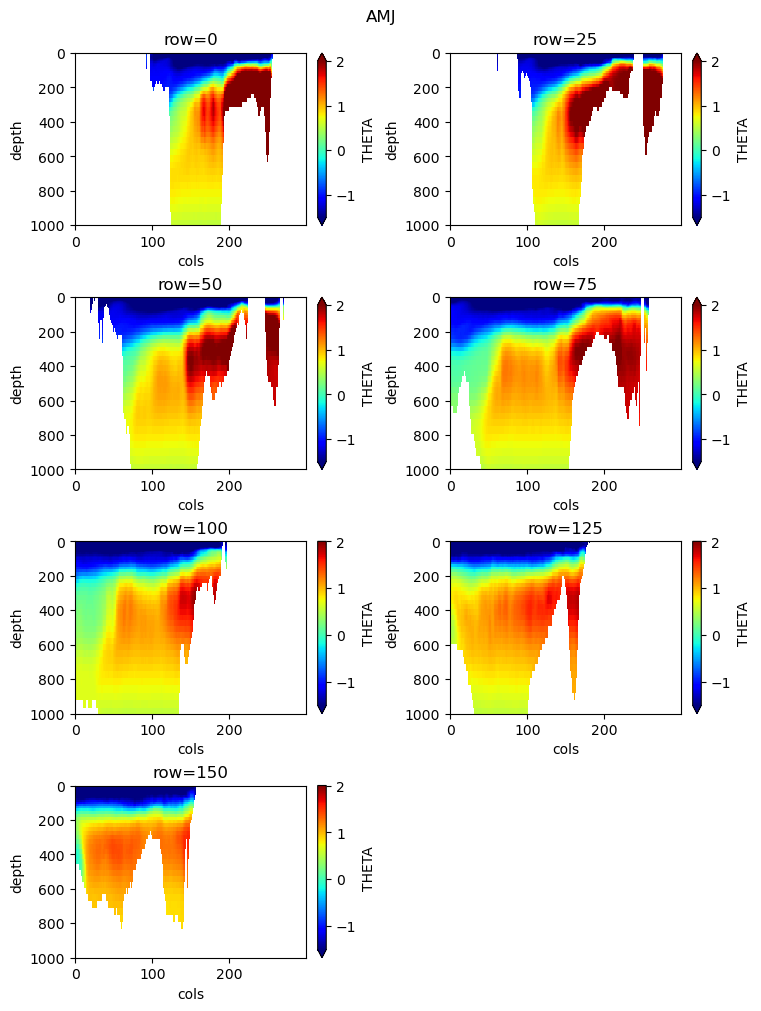

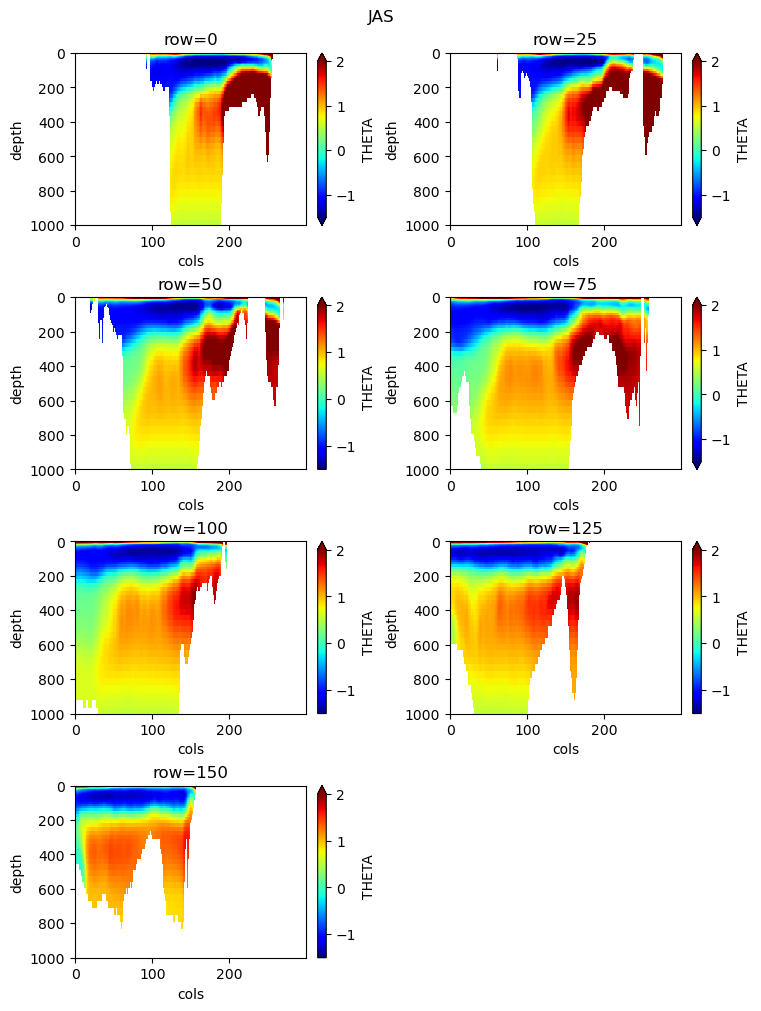

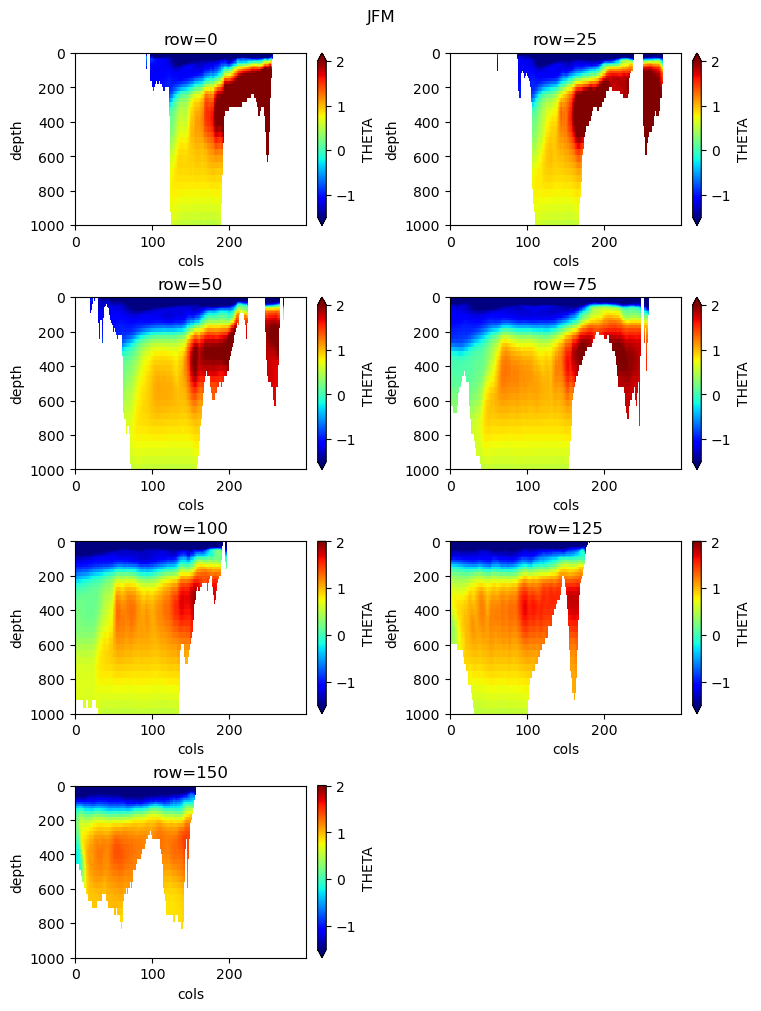

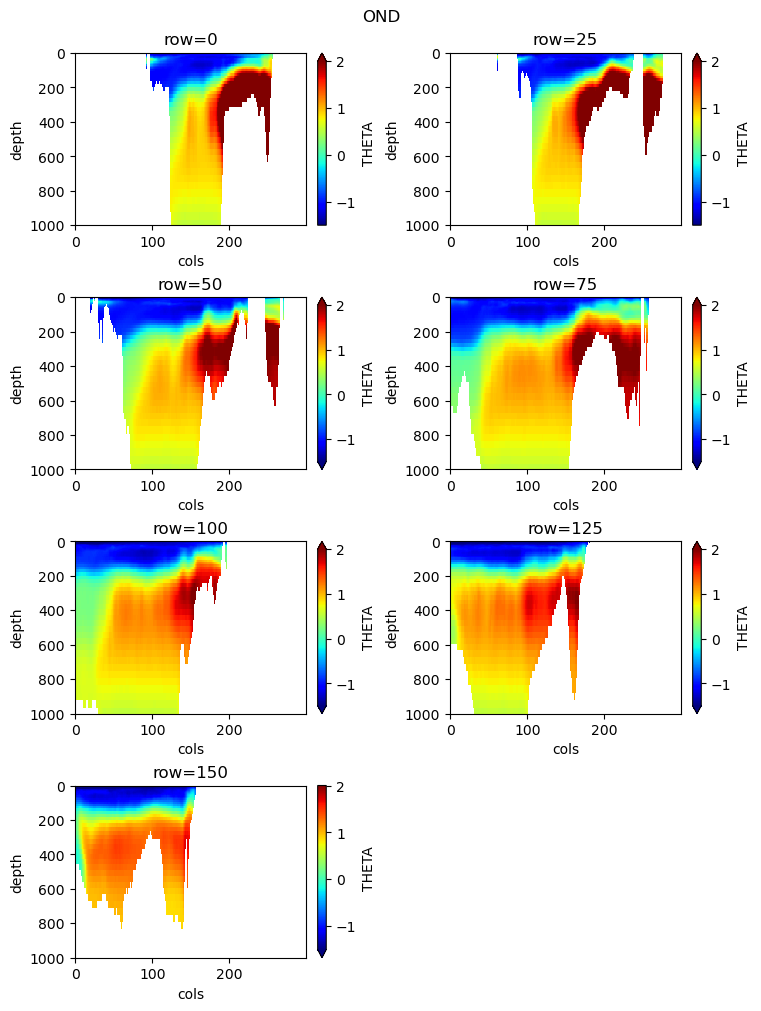

In [8]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    theta_row000_season.isel(season=i).THETA.plot(ax=ax1,vmin=-1.5,vmax=2,cmap='jet')
    theta_row025_season.isel(season=i).THETA.plot(ax=ax2,vmin=-1.5,vmax=2,cmap='jet')
    theta_row050_season.isel(season=i).THETA.plot(ax=ax3,vmin=-1.5,vmax=2,cmap='jet')
    theta_row075_season.isel(season=i).THETA.plot(ax=ax4,vmin=-1.5,vmax=2,cmap='jet')
    theta_row100_season.isel(season=i).THETA.plot(ax=ax5,vmin=-1.5,vmax=2,cmap='jet')
    theta_row125_season.isel(season=i).THETA.plot(ax=ax6,vmin=-1.5,vmax=2,cmap='jet')
    theta_row150_season.isel(season=i).THETA.plot(ax=ax7,vmin=-1.5,vmax=2,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(1000,0)
        ax.set_title(label)
        
    plt.suptitle(str(theta_row000_season.isel(season=i).season.values))
    
    plt.show()

#### Salinity

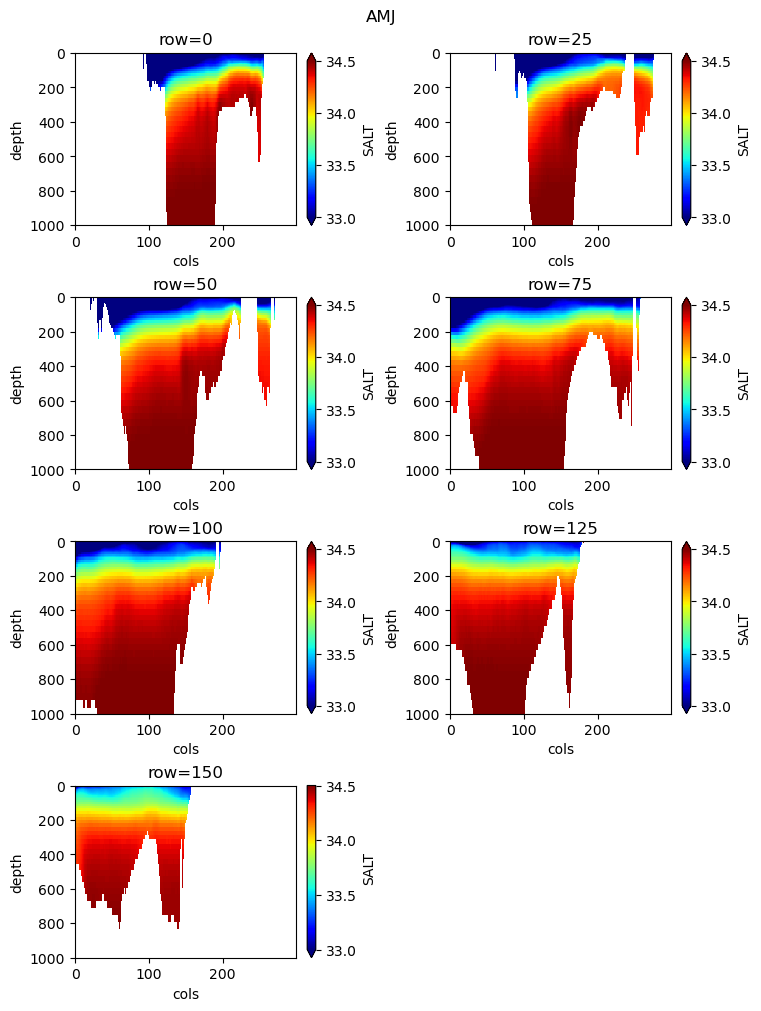

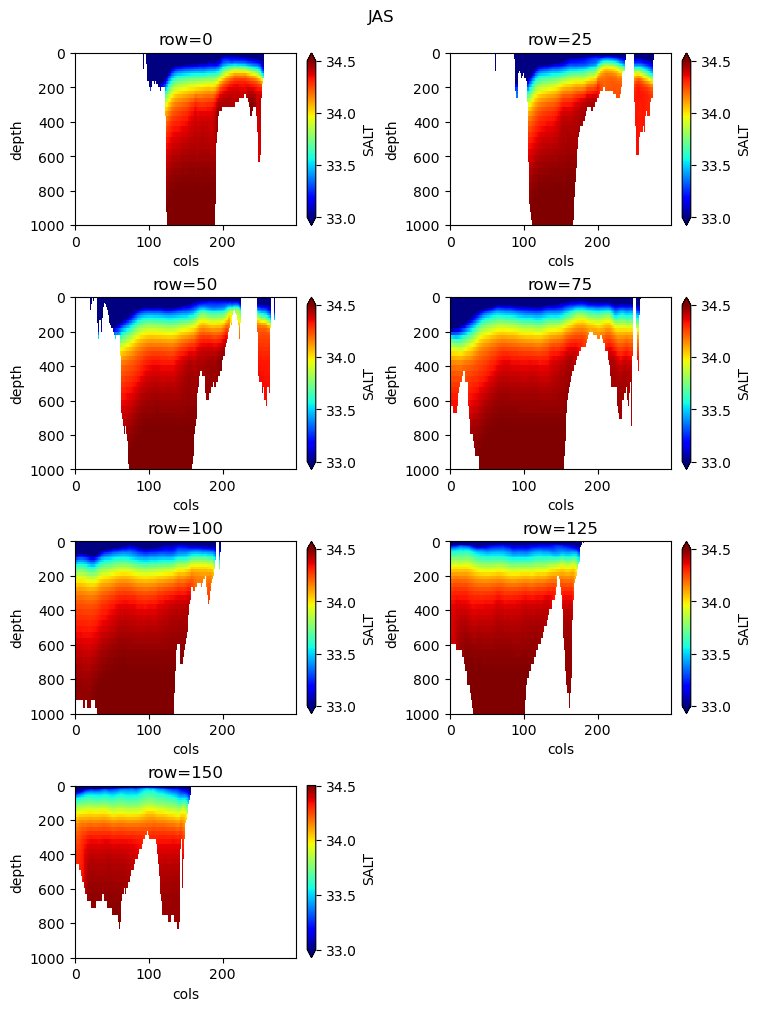

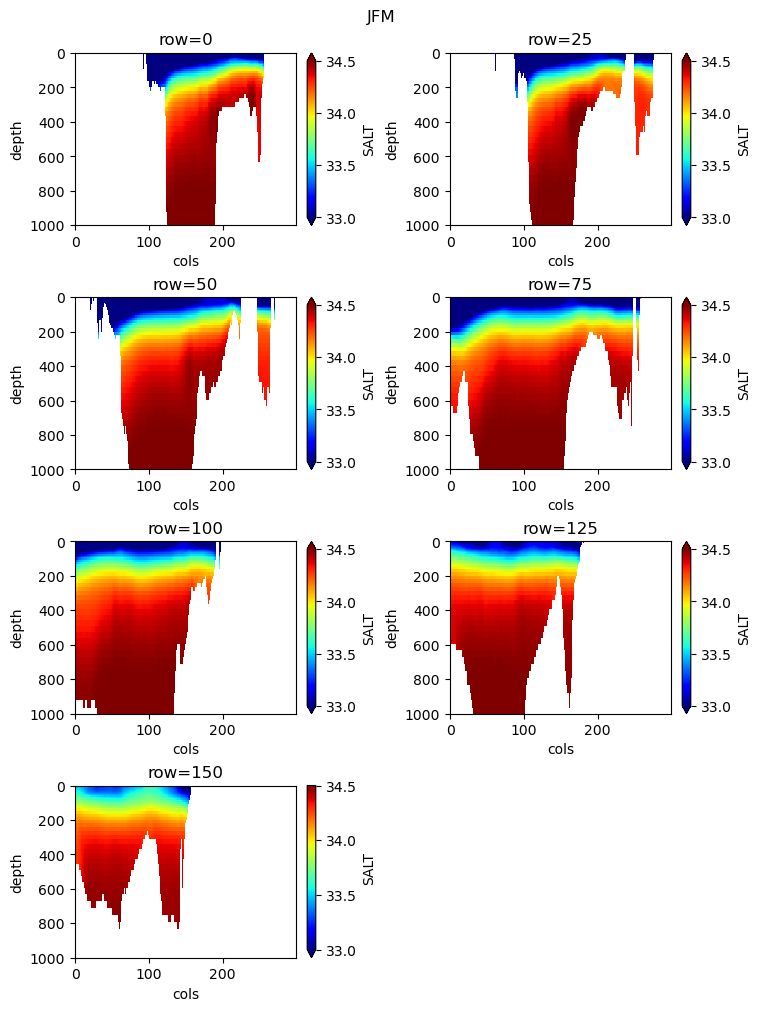

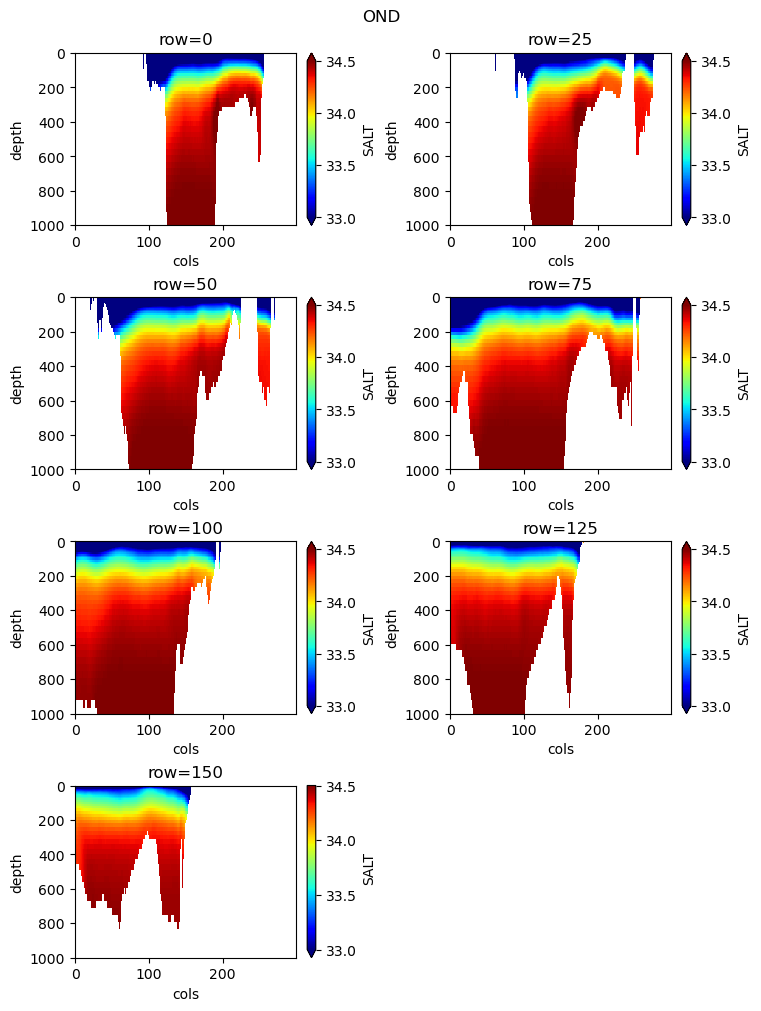

In [9]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    salt_row000_season.isel(season=i).SALT.plot(ax=ax1,vmin=33,vmax=34.5,cmap='jet')
    salt_row025_season.isel(season=i).SALT.plot(ax=ax2,vmin=33,vmax=34.5,cmap='jet')
    salt_row050_season.isel(season=i).SALT.plot(ax=ax3,vmin=33,vmax=34.5,cmap='jet')
    salt_row075_season.isel(season=i).SALT.plot(ax=ax4,vmin=33,vmax=34.5,cmap='jet')
    salt_row100_season.isel(season=i).SALT.plot(ax=ax5,vmin=33,vmax=34.5,cmap='jet')
    salt_row125_season.isel(season=i).SALT.plot(ax=ax6,vmin=33,vmax=34.5,cmap='jet')
    salt_row150_season.isel(season=i).SALT.plot(ax=ax7,vmin=33,vmax=34.5,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(1000,0)
        ax.set_title(label)
        
    plt.suptitle(str(salt_row000_season.isel(season=i).season.values))
        
    plt.show()

### Plot seasonal climatologies - upper 600 m

#### Theta

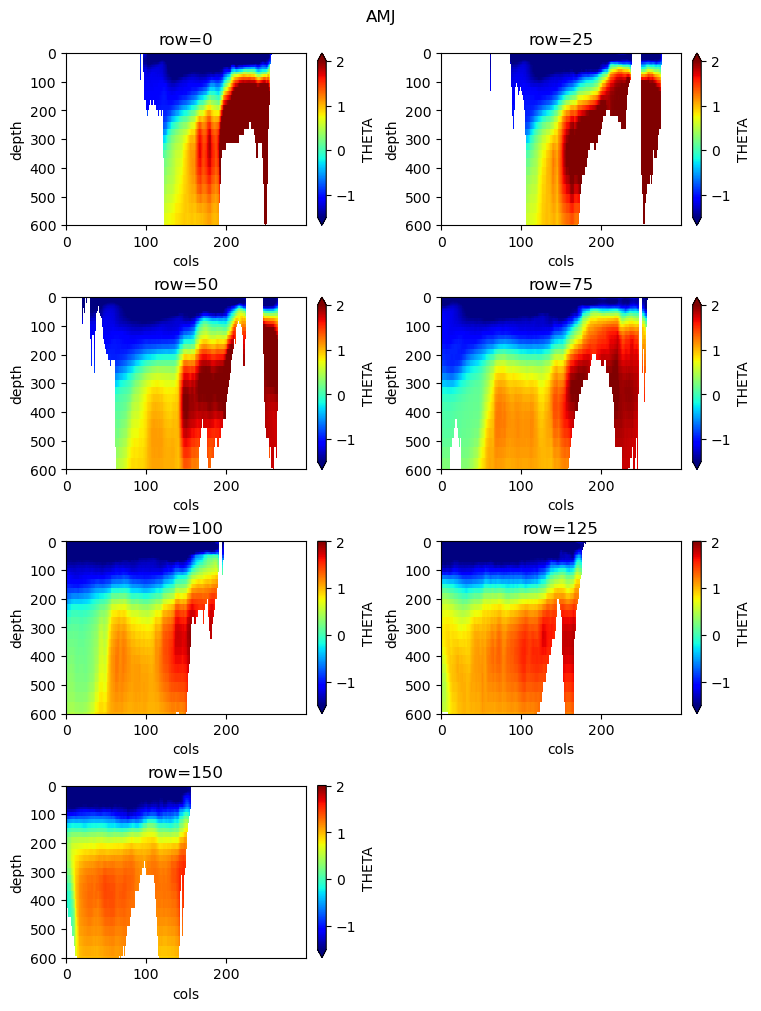

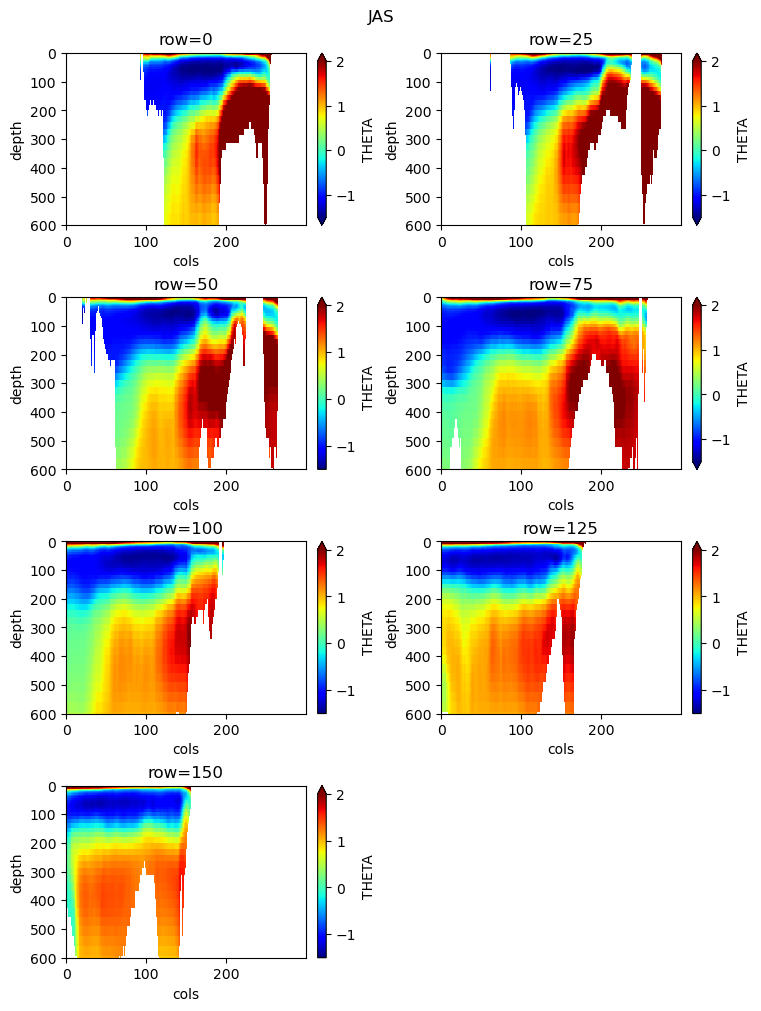

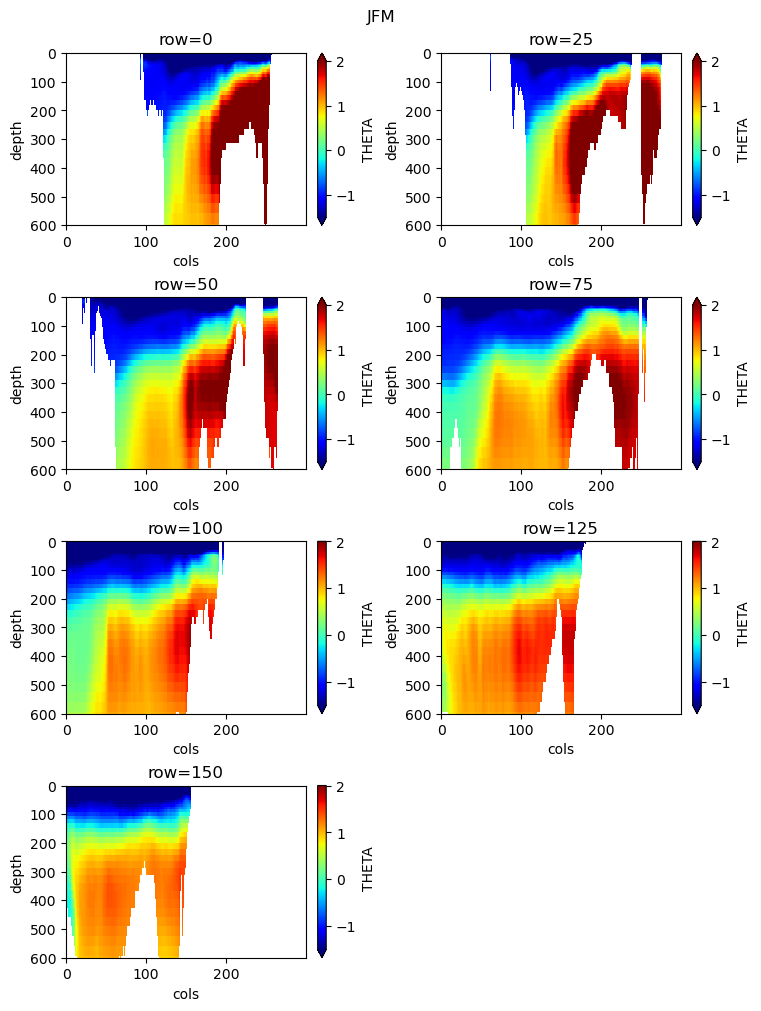

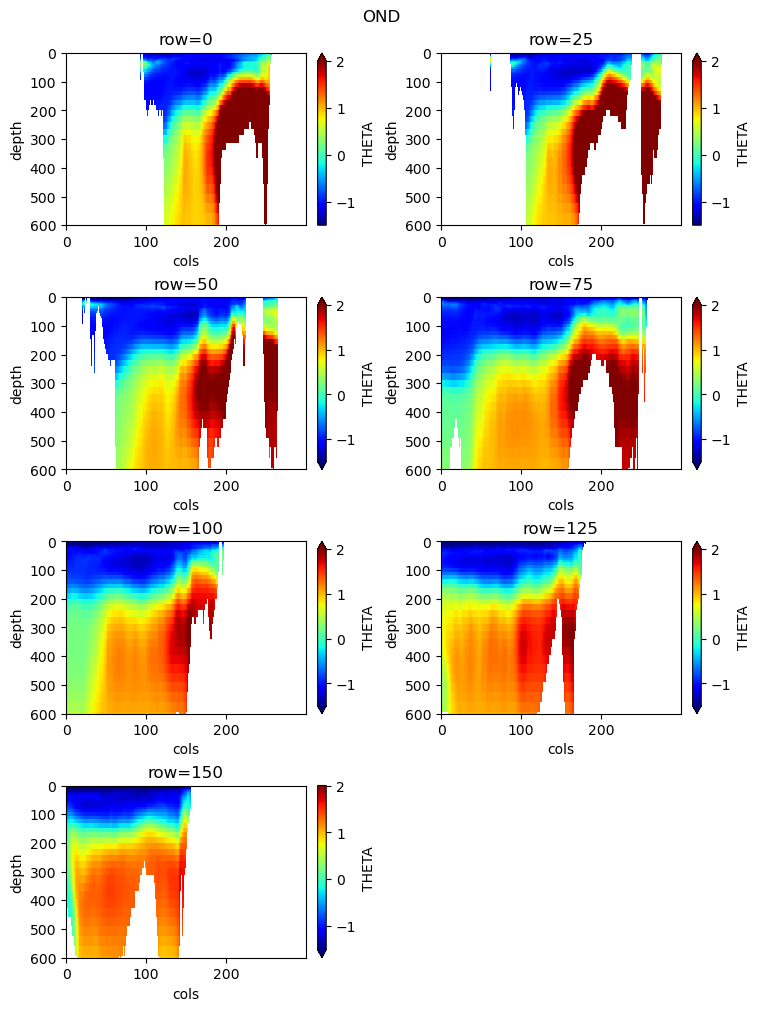

In [10]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    theta_row000_season.isel(season=i).THETA.plot(ax=ax1,vmin=-1.5,vmax=2,cmap='jet')
    theta_row025_season.isel(season=i).THETA.plot(ax=ax2,vmin=-1.5,vmax=2,cmap='jet')
    theta_row050_season.isel(season=i).THETA.plot(ax=ax3,vmin=-1.5,vmax=2,cmap='jet')
    theta_row075_season.isel(season=i).THETA.plot(ax=ax4,vmin=-1.5,vmax=2,cmap='jet')
    theta_row100_season.isel(season=i).THETA.plot(ax=ax5,vmin=-1.5,vmax=2,cmap='jet')
    theta_row125_season.isel(season=i).THETA.plot(ax=ax6,vmin=-1.5,vmax=2,cmap='jet')
    theta_row150_season.isel(season=i).THETA.plot(ax=ax7,vmin=-1.5,vmax=2,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(600,0)
        ax.set_title(label)
        
    plt.suptitle(str(theta_row000_season.isel(season=i).season.values))
    
    plt.show()

#### Salinity

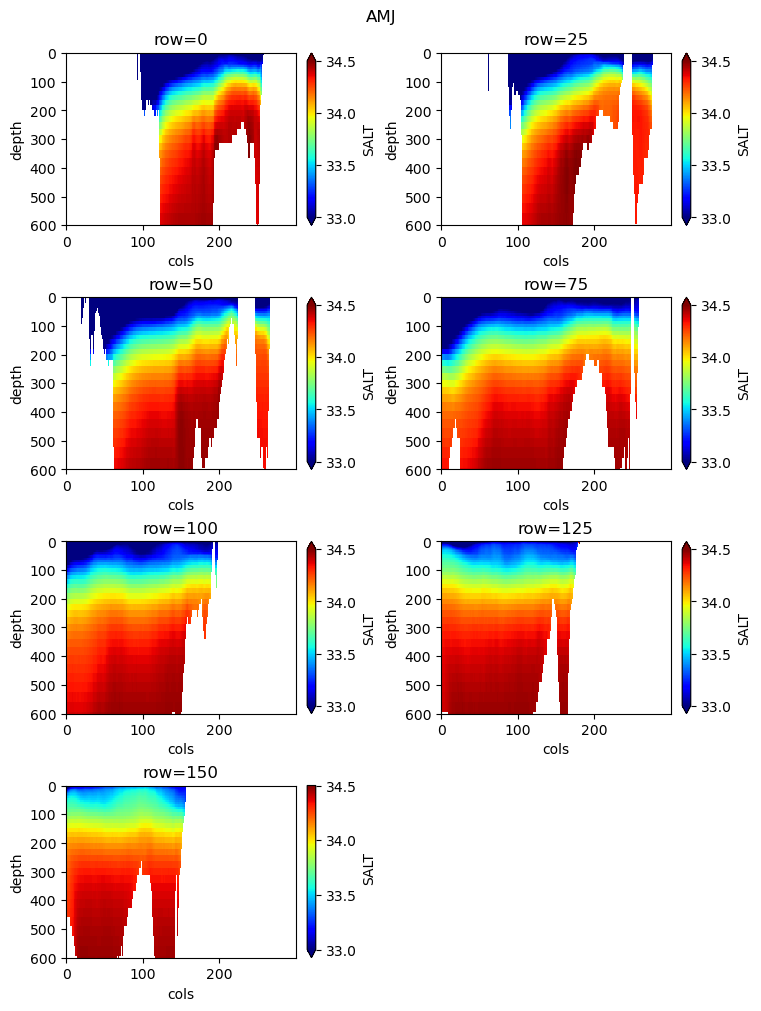

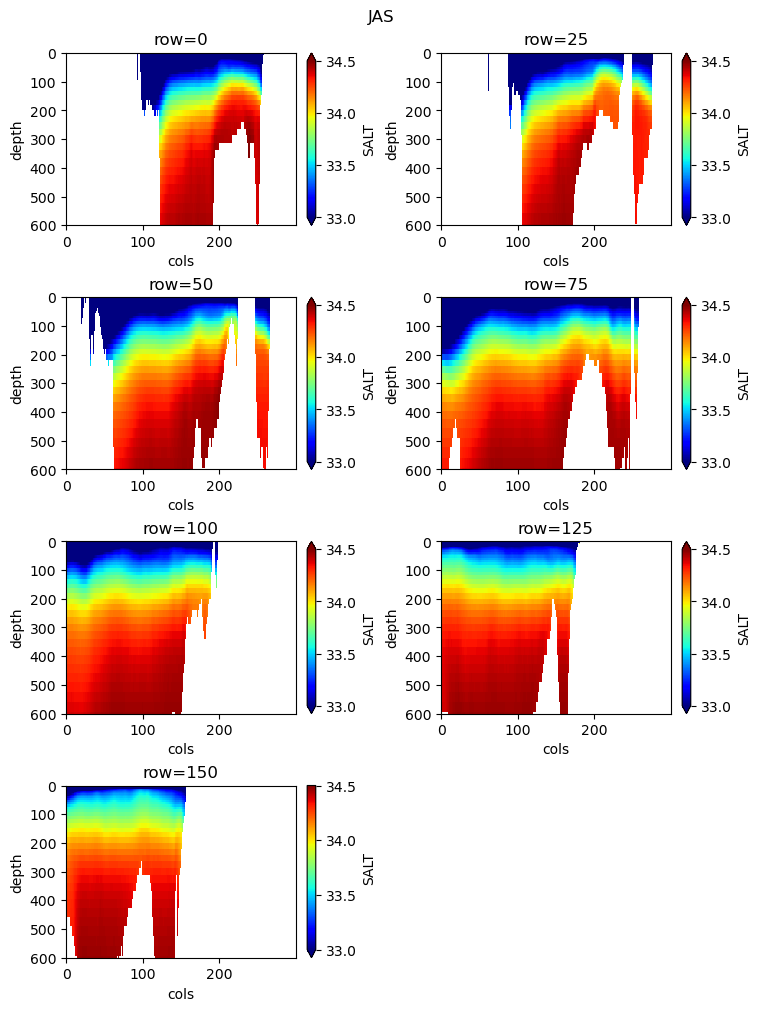

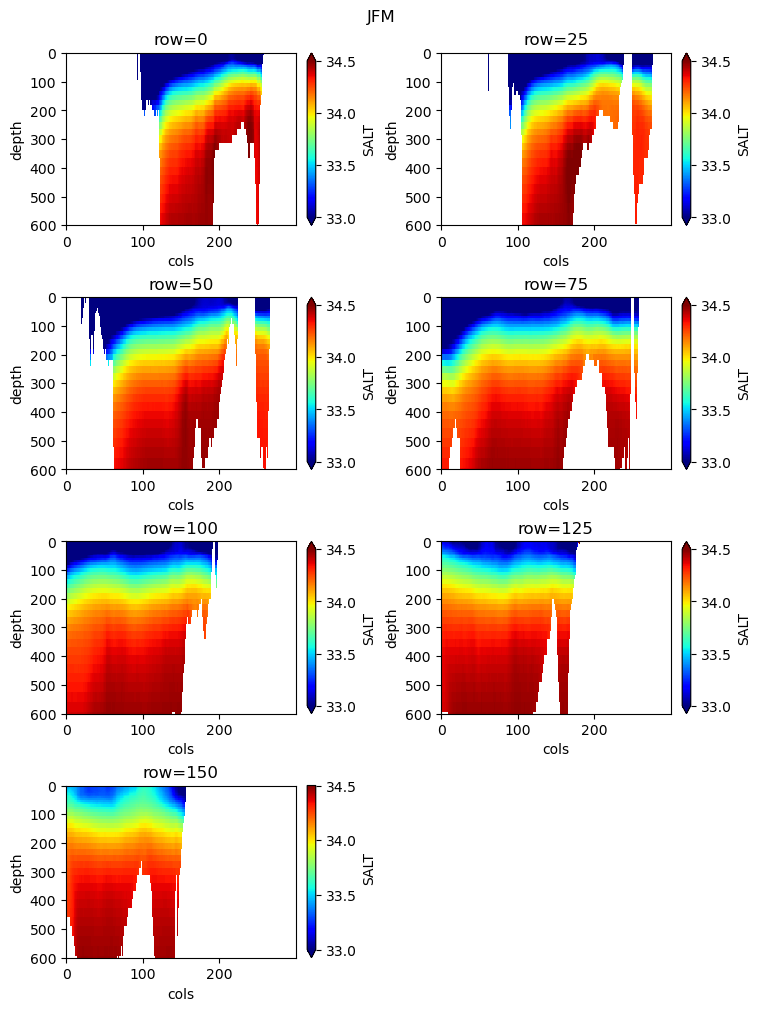

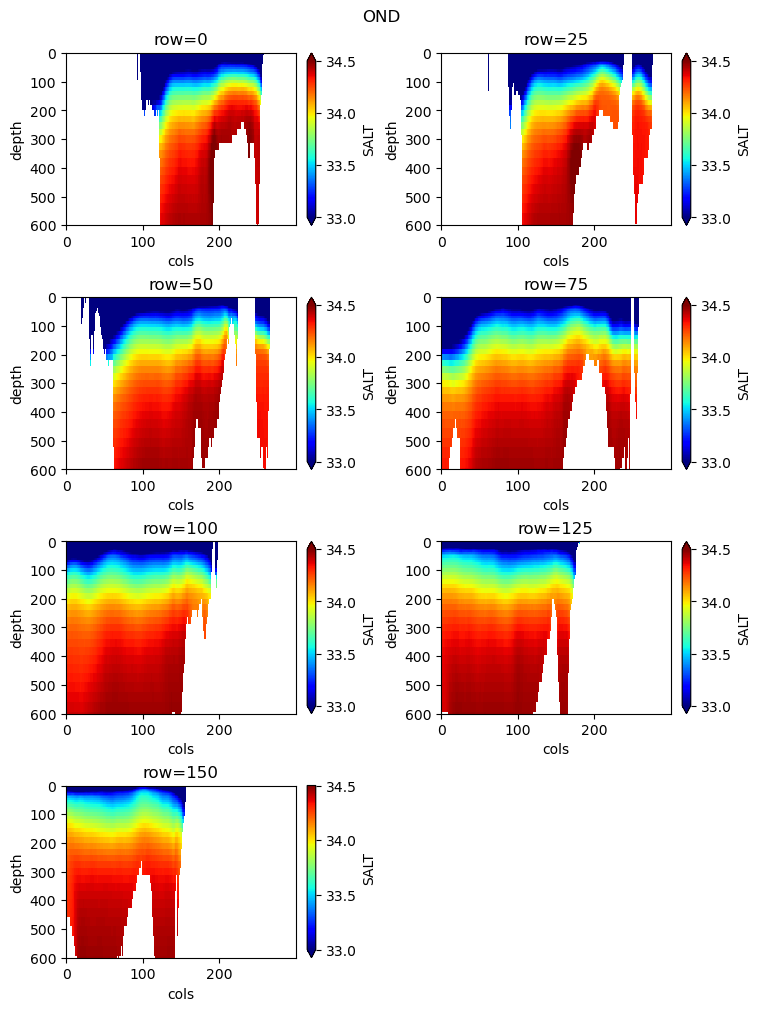

In [11]:
plt.rcParams['figure.figsize'] = [7.5, 10]
plt.rcParams['font.size'] = '10'

for i in range(4):
    fig, axs = plt.subplots(4,2,constrained_layout=True)
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.ravel()
    
    salt_row000_season.isel(season=i).SALT.plot(ax=ax1,vmin=33,vmax=34.5,cmap='jet')
    salt_row025_season.isel(season=i).SALT.plot(ax=ax2,vmin=33,vmax=34.5,cmap='jet')
    salt_row050_season.isel(season=i).SALT.plot(ax=ax3,vmin=33,vmax=34.5,cmap='jet')
    salt_row075_season.isel(season=i).SALT.plot(ax=ax4,vmin=33,vmax=34.5,cmap='jet')
    salt_row100_season.isel(season=i).SALT.plot(ax=ax5,vmin=33,vmax=34.5,cmap='jet')
    salt_row125_season.isel(season=i).SALT.plot(ax=ax6,vmin=33,vmax=34.5,cmap='jet')
    salt_row150_season.isel(season=i).SALT.plot(ax=ax7,vmin=33,vmax=34.5,cmap='jet')
    
    ax8.axis('off')
    
    labels=["row=0","row=25","row=50","row=75","row=100","row=125","row=150"]
    
    for ax,label in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),labels):
        ax.set_ylim(600,0)
        ax.set_title(label)
        
    plt.suptitle(str(salt_row000_season.isel(season=i).season.values))
        
    plt.show()